# Carregando as bibliotecas necessárias

In [1]:
# Para manipular dados
import numpy as np
import pandas as pd

# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para mapas
import requests
import folium

# Possibilita que todos os outputs apareçam
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interacyivity = "all"

# Ignorando os avisos
import sys
import warnings

warnings.filterwarnings("ignore")

# Seta os limites máximode colunas e linhas
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# Settings para padronização de outputs
sns.set()
pd.options.display.max_columns = 500
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10, 5]
%load_ext nb_black

<IPython.core.display.Javascript object>

# Analisando os dados

In [2]:
# Carregando o dataset
barragens = pd.read_csv(
    "database_versao_LatLongDecimal_fonteANM_23_01_2019.csv",
    sep=",",
    decimal=",",
    dtype={
        "LATITUDE": "string",
        "LONGITUDE": "string",
        "NOME_BARRAGEM_MINERACAO": "string",
        "CPF_CNPJ": "string",
    },
)

<IPython.core.display.Javascript object>

In [3]:
# Espiando o dataset
barragens.head(5)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.00,"27,700,000.00",Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.30,"924,000.00",Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.00,"48,873.00",Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778
3,158 (A-1),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,30.00,"53,380,000.00",Baixa,Alta,B,Sim,0.738027777777778,-60.0789166666667
4,161 (A-2),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.00,"1,018,054.00",Baixa,Média,C,Sim,0.732286944444444,-60.0689988888889


<IPython.core.display.Javascript object>

In [4]:
# Vendo o formato do dataset
barragens.shape

(714, 15)

<IPython.core.display.Javascript object>

In [5]:
# Verificando informações
barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string
 1   NOME_DO_EMPREENDEDOR      714 non-null    object
 2   CPF_CNPJ                  714 non-null    string
 3   POSICIONAMENTO            714 non-null    object
 4   UF                        714 non-null    object
 5   MUNICIPIO                 714 non-null    object
 6   MINERIO_PRINCIPAL         714 non-null    object
 7   ALTURA_ATUAL_metros       714 non-null    object
 8   VOLUME_ATUAL_m3           714 non-null    object
 9   CATEGORIA_DE_RISCO        390 non-null    object
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object
 11  CLASSE                    390 non-null    object
 12  INSERIDA_NA_PNSB          714 non-null    object
 13  LATITUDE                  714 non-null    string
 14  LONGITUDE                 

<IPython.core.display.Javascript object>

In [6]:
# Para seguir a análise, precisamos converter os campos de altura e volume para o formato numérico
columns = ["ALTURA_ATUAL_metros", "VOLUME_ATUAL_m3"]

for column in columns:
    # Trocamos vírgula por espaço vazio
    barragens[f"{column}"] = barragens[f"{column}"].str.replace(",", "")
    # Trocamos os hiféns por nulos
    barragens[f"{column}"] = barragens[f"{column}"].replace("-", np.nan)
    # Transformando em numérico
    barragens[f"{column}"] = pd.to_numeric(barragens[f"{column}"])

<IPython.core.display.Javascript object>

In [7]:
# Verificando resultado das informações
barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string 
 1   NOME_DO_EMPREENDEDOR      714 non-null    object 
 2   CPF_CNPJ                  714 non-null    string 
 3   POSICIONAMENTO            714 non-null    object 
 4   UF                        714 non-null    object 
 5   MUNICIPIO                 714 non-null    object 
 6   MINERIO_PRINCIPAL         714 non-null    object 
 7   ALTURA_ATUAL_metros       697 non-null    float64
 8   VOLUME_ATUAL_m3           707 non-null    float64
 9   CATEGORIA_DE_RISCO        390 non-null    object 
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object 
 11  CLASSE                    390 non-null    object 
 12  INSERIDA_NA_PNSB          714 non-null    object 
 13  LATITUDE                  714 non-null    string 
 14  LONGITUDE 

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Dataset ANM de barragens: Análise de valores ausentes')

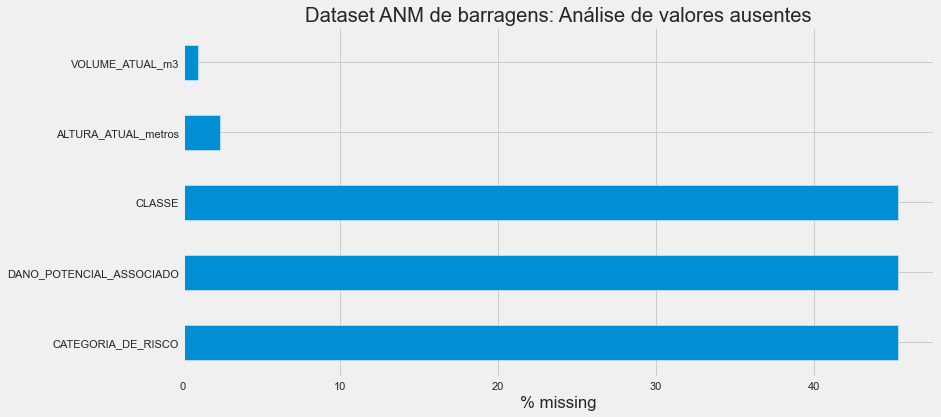

<IPython.core.display.Javascript object>

In [8]:
# Percentual de missing no dataset
# Pega as colunas que tem missing
na_cols = [col for col in barragens if (barragens[col].isna().sum() > 0)]

ax = (
    barragens[na_cols]
    .isna()
    .mean()  # Ao realizar a média, neste caso, fazemos a quantidade de valores ausentes / pelo total, no caso, a média
    .sort_values(ascending=False)  # Ordena de forma decrescente
    .mul(100)  # coloca em centenas
    .plot(kind="barh", figsize=(12, 6))  # Plota o gráfico horizontal
)

ax.set_xlabel("% missing")  # Título do eixo x
ax.set_title(
    "Dataset ANM de barragens: Análise de valores ausentes"
)  # Título do gráfico

In [9]:
# Verificando os nulos
barragens[barragens["CATEGORIA_DE_RISCO"].isna()].head()

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
390,22,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,6.0,56519.00,NaN,NaN,NaN,Não,0.738638888888889,-60.1673888888889
391,42,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,4.9,130979.00,NaN,NaN,NaN,Não,0.723527777777778,-60.1967222222222
392,69,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,84941.00,NaN,NaN,NaN,Não,0.743194444444444,-60.2014166666667
393,189,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,209969.00,NaN,NaN,NaN,Não,0.789555555555556,-60.0130277777778
394,1-30,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,8.0,1320.09,NaN,NaN,NaN,Não,0.707111111111111,-60.1925277777778


<IPython.core.display.Javascript object>

É preocupante notar que mais de 40% dos dados da categoria de risco estão ausentes, mas verificamos que estes casos não se enquadram na PNSB.

Ao nos debruçarmos mais detidamente na PNSB, econtramos os critérios de enquadramento:

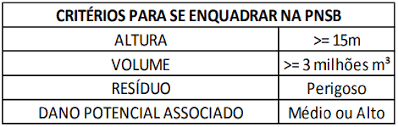
Fonte: [Ofício nº 86/2019/GAB - DG/DIRC](https://legis.senado.leg.br/sdleg-getter/documento?dm=7939404&ts=1554832639821&disposition=inline)

In [10]:
# Verificando informações relevantes sobre missing values
barragens[barragens["CATEGORIA_DE_RISCO"].isna()].describe()

,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3
count,307.000000,3.170000e+02
mean,6.961922,1.417104e+05
std,3.739758,2.813656e+05
min,1.000000,1.000000e-02
25%,4.000000,5.250000e+03
50%,6.200000,2.000000e+04
75%,10.000000,1.400590e+05
max,14.900000,1.965306e+06


<IPython.core.display.Javascript object>

Verificamos que os dados com informações ausentes em relação a suas categorias de risco, não atendem aos critérios para se enquadrar na PNSB.

Vamos então transformar a coluna categoria de risco em uma nova coluna binária (0 ou 1) que representa a presença ou ausência desse valor, chamamos essa nova coluna de dummy.

In [11]:
# Criando Dummy
barragens["dummy_PNSB"] = np.where(barragens["INSERIDA_NA_PNSB"] == "Sim", 1, 0)

<IPython.core.display.Javascript object>

In [12]:
# Verificando os percentuais das categorias
barragens["dummy_PNSB"].value_counts(normalize=True)

1    0.546218
0    0.453782
Name: dummy_PNSB, dtype: float64

<IPython.core.display.Javascript object>

Verificamos então que são justamente estes 45% que não possuem os dados sobre as categorias de risco.

Vamos verificar algumas informações sobre as barragens a partir do tipo de minério:

In [13]:
# Resumo por minério
resumo = (
    barragens.groupby(["MINERIO_PRINCIPAL"])  # Agrupa a partir desta coluna
    .agg(  # Função que cria cálculos a partir do agrupamento
        sum_pnsb=("dummy_PNSB", "sum"),
        max_altura=("ALTURA_ATUAL_metros", "max"),
        max_volume=("VOLUME_ATUAL_m3", "max"),
        media_altura=("ALTURA_ATUAL_metros", "mean"),
        media_volume=("VOLUME_ATUAL_m3", "mean"),
    )
    .reset_index()
)

# Mostrando a tabela
resumo.sort_values(by="sum_pnsb", ascending=False).head()

,MINERIO_PRINCIPAL,sum_pnsb,max_altura,max_volume,media_altura,media_volume
36,Minério de Ferro,132,100.0,226957900.0,24.316714,5.128368e+06
40,Minério de Ouro Primário,47,104.0,399058945.0,27.736909,1.222090e+07
8,Argila,32,25.0,11900000.0,11.648939,2.111966e+06
26,Fosfato,17,91.0,170000000.0,28.682105,1.613386e+07
21,Caulim,15,35.0,1755555.0,12.520000,5.216533e+05


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Quantidade de barragens por tipo de minério em depósito')

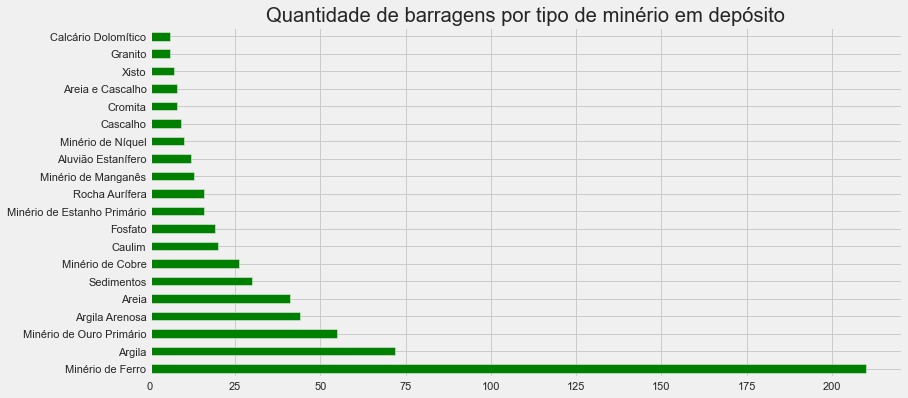

<IPython.core.display.Javascript object>

In [14]:
# Vamos verificar as barragens por tipo de tipo de minério
plt.figure(1, figsize=(12, 6))
barragens["MINERIO_PRINCIPAL"].value_counts()[:20].plot(kind="barh", color="green")
plt.title("Quantidade de barragens por tipo de minério em depósito")

Vamos verificar se há relação entre a categoria de risco e altura da barragem e/ou volume da barragem.

In [15]:
barragens.groupby("CATEGORIA_DE_RISCO")["ALTURA_ATUAL_metros", "VOLUME_ATUAL_m3"].mean()

,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3
CATEGORIA_DE_RISCO,,
Alta,28.666667,3.380292e+05
Baixa,27.960723,8.960697e+06
Média,16.377273,2.019007e+06


<IPython.core.display.Javascript object>

Vamos verificar a quantidade de categorias de risco

Text(0.5, 1.0, 'Qtd. de barragens por Categorias de risco')

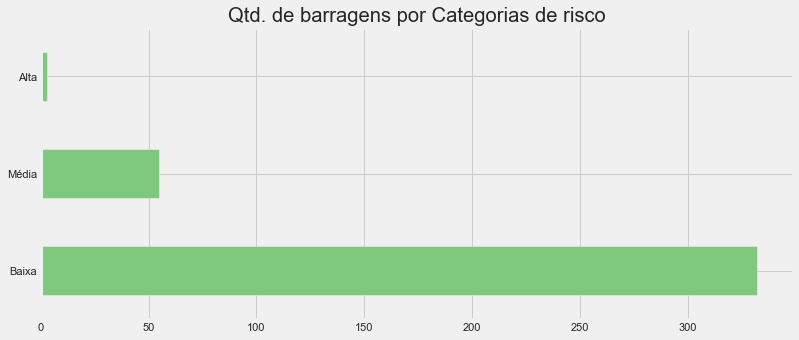

<IPython.core.display.Javascript object>

In [16]:
plt.figure(1, figsize=(12, 5))
barragens["CATEGORIA_DE_RISCO"].value_counts().plot(kind="barh", colormap="Accent")
plt.title("Qtd. de barragens por Categorias de risco")

Vamos verificar a quantidade de barragens por estado:

Text(0.5, 1.0, 'Qtd. de barragens por UF')

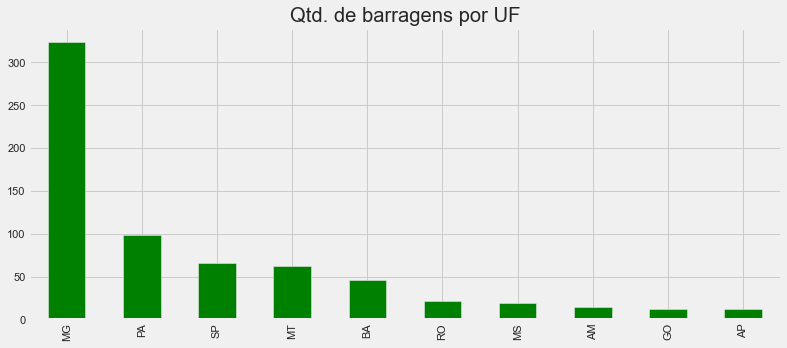

<IPython.core.display.Javascript object>

In [17]:
# Quantidade de barragens por UF
plt.figure(1, figsize=(12, 5))
barragens["UF"].value_counts()[:10].plot(kind="bar", color="green")
plt.title("Qtd. de barragens por UF")

Vamos verificar a relação entre estados e categorias de risco. Para isso precisaremos tornar a coluna de dano potencial associado em dummy. Faremos isto de outra forma desta vez.

In [18]:
# Criando dummy para cada dano potencial

barragens = pd.concat(
    [
        barragens,
        pd.get_dummies(barragens["DANO_POTENCIAL_ASSOCIADO"], "Dano_Potencial_"),
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [19]:
# Risco de acordo com a UF
resumo_por_uf = (
    barragens.groupby(["UF"])
    .agg(
        contagem_geral=("Dano_Potencial__Alta", "count"),
        contagem_por_risco_alto=("Dano_Potencial__Alta", "sum"),
        perc_risco_alto=("Dano_Potencial__Alta", "mean"),
        Missing_Risco=("CATEGORIA_DE_RISCO", lambda x: x.isnull().mean(),),
        Missing_Dano=("DANO_POTENCIAL_ASSOCIADO", lambda x: x.isnull().mean(),),
    )
    .reset_index()
    .round(1)
)

resumo_por_uf.sort_values(by="contagem_geral", ascending=False).head()

,UF,contagem_geral,contagem_por_risco_alto,perc_risco_alto,Missing_Risco,Missing_Dano
6,MG,324,132,0.4,0.4,0.4
9,PA,98,18,0.2,0.3,0.3
18,SP,66,7,0.1,0.7,0.7
8,MT,62,5,0.1,0.5,0.5
2,BA,46,6,0.1,0.7,0.7


<IPython.core.display.Javascript object>

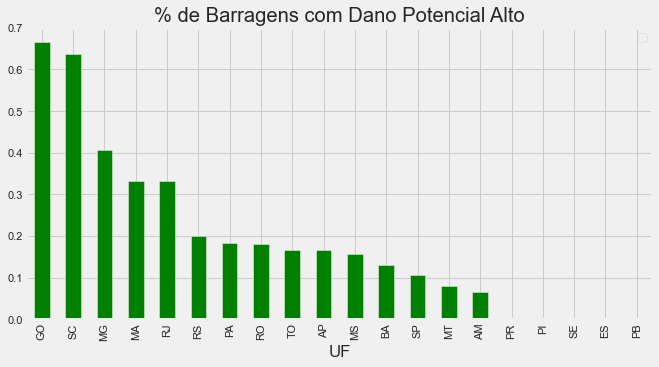

<IPython.core.display.Javascript object>

In [20]:
# Verificando se algum estado possui mais barragens em risco
pd.pivot_table(
    data=barragens, index=["UF"], values=["Dano_Potencial__Alta"], aggfunc="mean"
).sort_values(by="Dano_Potencial__Alta", ascending=False).plot(
    kind="bar", color="green"
)

plt.title("% de Barragens com Dano Potencial Alto")
plt.legend("")

* Por mais que os estados de GO e SC não poussuam muitas barragens, o fato de possuírem cerca de 60% de barragens com risco potencial alto acende um alerta para um estudo mais aprofundado destes locais.

* Um outro dado alarmante é perceber que MG, estado com maior número de barragens, possuir cerca de 40% de barragens com risco potencial alto, isso corresponde a mais de 120 barragens.

Text(0.5, 1.0, '% de barragens fora da PSNB')

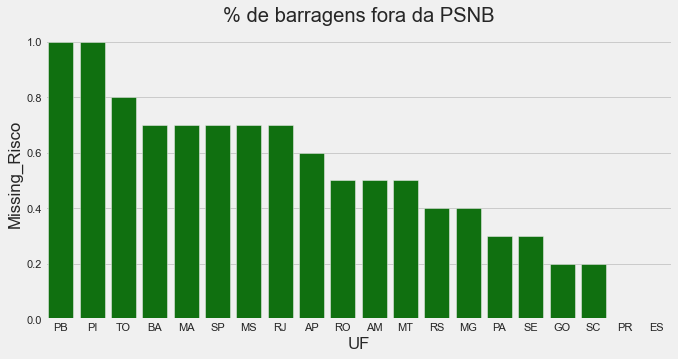

<IPython.core.display.Javascript object>

In [21]:
# Vamos verificar os estados que mais tem barragens fora da PNSB
sns.barplot(
    data=resumo_por_uf.sort_values(by="Missing_Risco", ascending=False),
    x="UF",
    y="Missing_Risco",
    color="green",
)

plt.title("% de barragens fora da PSNB")

Todas as barragens de PB e PI não estão incluídas na PNSB

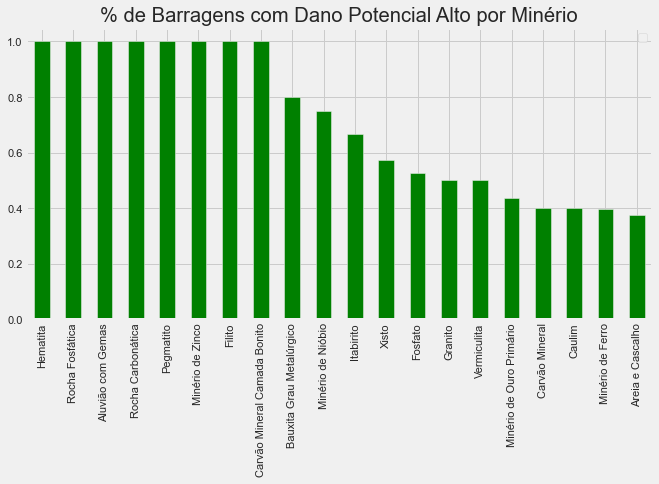

<IPython.core.display.Javascript object>

In [22]:
# Vamos verificar a relação entre o minério principal e dano potencial alto
pd.pivot_table(
    data=barragens,
    index=["MINERIO_PRINCIPAL"],
    values=["Dano_Potencial__Alta"],
    aggfunc="mean",
).sort_values(by="Dano_Potencial__Alta", ascending=False).head(20).plot(
    kind="bar", color="green"
)

plt.title("% de Barragens com Dano Potencial Alto por Minério")
plt.xlabel("")
plt.legend("")

Vamos verificar se uma empresa possuí mais barragens com risco alto.

In [23]:
# Risco de acordo com a empresa
resumo_por_empresa = (
    barragens.groupby(["NOME_DO_EMPREENDEDOR"])
    .agg(
        contagem_geral=("Dano_Potencial__Alta", "count"),
        contagem_por_risco_alto=("Dano_Potencial__Alta", "sum"),
        perc_risco_alto=("Dano_Potencial__Alta", "mean"),
        Missing_Risco=("CATEGORIA_DE_RISCO", lambda x: x.isnull().mean(),),
        Missing_Dano=("DANO_POTENCIAL_ASSOCIADO", lambda x: x.isnull().mean(),),
    )
    .reset_index()
    .round(1)
)

resumo_por_empresa.sort_values(by="contagem_por_risco_alto", ascending=False).head()

,NOME_DO_EMPREENDEDOR,contagem_geral,contagem_por_risco_alto,perc_risco_alto,Missing_Risco,Missing_Dano
215,Vale S A Filial: Vale Itabira,17,13,0.8,0.1,0.1
216,Vale S A Filial: Vale Itabiritos,19,11,0.6,0.3,0.3
220,Vale S A Filial: Vale Minas Centrais,20,10,0.5,0.4,0.4
223,Vale S A Filial: Vale Paraopeba,11,9,0.8,0.0,0.0
83,Imerys. Rio Capim Caulim S A,10,7,0.7,0.0,0.0


<IPython.core.display.Javascript object>

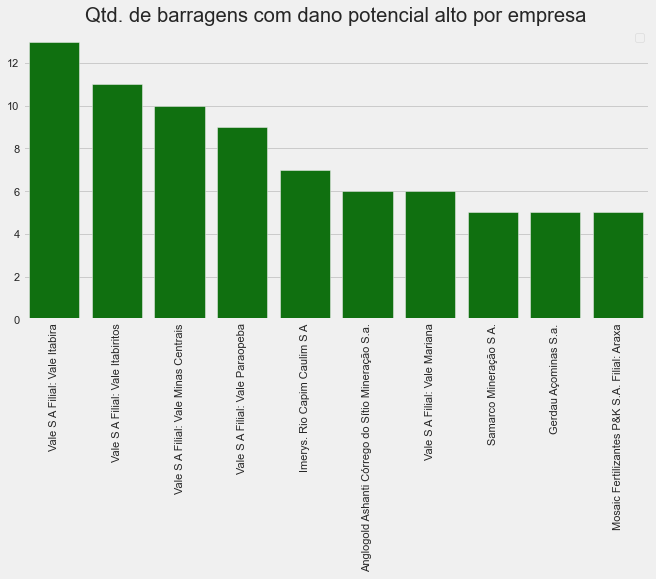

<IPython.core.display.Javascript object>

In [24]:
# Vamos verificar as empresas com maior quantidade de barragens com dano potencial
sns.barplot(
    data=resumo_por_empresa.sort_values(
        by="contagem_por_risco_alto", ascending=False
    ).head(10),
    x="NOME_DO_EMPREENDEDOR",
    y="contagem_por_risco_alto",
    color="green",
)

plt.title("Qtd. de barragens com dano potencial alto por empresa")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.legend("")

Podemos verificar que a mineradora Vale domina o gráfico que diz respeito a quantidade de barragens com dano potencial alto.